In [2]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Retrieve the Excel file from IBGE ftp

In [24]:
excel_2015 = "ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2015/Tabelas_de_Resultados/xlsx/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/02_Equipamento_Utlizado_para_Acessar_a_Internet.xlsx"

# Create DataFrame with the *.xlsx file

In [25]:
df = pd.read_excel(excel_2015, sheet_name='Tab 1.2.1.1 e 1.2.1.2')

In [26]:
df.head()

,"Tabela 1.2.1.1 - Pessoas de 10 anos ou mais de idade que utilizaram a Internet, no período de referência dos últimos três meses, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,"Tabela 1.2.1.2 - Distribuição das pessoas de 10 anos ou mais de idade, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Equipamento utilizado para acessar a Internet,Pessoas de 10 anos ou mais de idade que utiliz...,NaN,NaN,NaN,NaN,NaN,Equipamento utilizado para acessar a Internet,Distribuição das pessoas de 10 anos ou mais de...,NaN,NaN,NaN,NaN,NaN
2,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN
3,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
4,Total,102083,6715.31,21831.1,49247,15759,8530.74,Total,100,100,100,100,100,100


In [29]:
df = df[df.columns[0:7]]

In [30]:
df.head()

,"Tabela 1.2.1.1 - Pessoas de 10 anos ou mais de idade que utilizaram a Internet, no período de referência dos últimos três meses, por Grandes Regiões, segundo o equipamento utilizado para acessar a Internet - 2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Equipamento utilizado para acessar a Internet,Pessoas de 10 anos ou mais de idade que utiliz...,NaN,NaN,NaN,NaN,NaN
2,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN
3,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
4,Total,102083,6715.31,21831.1,49247,15759,8530.74


In [31]:
df.columns = ['Label', 'Total', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

In [32]:
df

,Label,Total,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Equipamento utilizado para acessar a Internet,Pessoas de 10 anos ou mais de idade que utiliz...,NaN,NaN,NaN,NaN,NaN
2,NaN,Brasil,Grandes Regiões,NaN,NaN,NaN,NaN
3,NaN,NaN,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
4,Total,102083,6715.31,21831.1,49247,15759,8530.74
5,Microcomputador,NaN,NaN,NaN,NaN,NaN,NaN
6,Utilizaram,72608,3521.63,13576.8,37287.6,12259.3,5962.68
7,Somente microcomputador,11080,517.152,2240.19,5381.82,2286.37,654.431
8,Não utilizaram,29475.1,3193.68,8254.31,11959.4,3499.7,2568.06
9,Telefone móvel celular ou tablet,NaN,NaN,NaN,NaN,NaN,NaN


### Remove useless rows

In [33]:
df = df.drop(df.index[:5])
df = df.drop(df.index[-1])
df = df.drop(df.index[-1])
df

,Label,Total,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
5,Microcomputador,NaN,NaN,NaN,NaN,NaN,NaN
6,Utilizaram,72608,3521.63,13576.8,37287.6,12259.3,5962.68
7,Somente microcomputador,11080,517.152,2240.19,5381.82,2286.37,654.431
8,Não utilizaram,29475.1,3193.68,8254.31,11959.4,3499.7,2568.06
9,Telefone móvel celular ou tablet,NaN,NaN,NaN,NaN,NaN,NaN
10,Utilizaram,90484.9,6157.44,19498.5,43615.7,13379.5,7833.77
11,Somente telefone móvel celular ou tablet,28765.1,3143.93,8118.02,11609.3,3389.64,2504.24
12,Não utilizaram,11598.2,557.87,2332.56,5631.32,2379.5,696.968
13,Telefone móvel celular,NaN,NaN,NaN,NaN,NaN,NaN
14,Utilizaram,89634.4,6122.78,19314.8,43185.3,13221.7,7789.83


### Get all gadgets names

In [34]:
gadgets = df[df.isna().Total].Label.iloc[:].values
gadgets

array(['Microcomputador', 'Telefone móvel celular ou tablet',
       'Telefone móvel celular', 'Tablet', 'Televisão',
       'Outro equipamento'], dtype=object)

### Get a List with all 'somente *' values

In [55]:
df = df.dropna()
values_2015 = df[df.Label.str.contains('Somente')].Total.iloc[:].values
values_2015

array([11079.97, 28765.132, 27003.38, 368.096], dtype=object)

# Define a function to execute all previous DF steps to a given region

In [57]:
def extract_data(excel, region):
    df = pd.read_excel(excel, sheet_name='Tab 1.2.1.1 e 1.2.1.2')
    
    df = df[df.columns[0:7]]
    df.columns = ['Label', 'Total', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
        
    df = df.dropna()
    return df[df.Label.str.contains('Somente')][region].iloc[:].values
    

In [44]:
excel_2014 = 'ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2014/Tabelas_de_Resultados/xlsx/01_Pessoas_de_10_Anos_ou_Mais_de_Idade/02_Equipamento_Utlizado_para_Acessar_a_Internet.xlsx'
values_2014 = extract_data(excel_2014, 'Total')

In [43]:
excel_2013 = 'ftp://ftp.ibge.gov.br/Acesso_a_internet_e_posse_celular/2013/tabelas_xls/01pessoas/02equipamentos.xls'
values_2013 = extract_data(excel_2013, 'Total')

# Build new DataFrame with all years

In [45]:
dic = {
    'Gadget': gadgets[:4],
    '2015': values_2015, 
    '2014': values_2014, 
    '2013': values_2013
}

In [46]:
df_years = pd.DataFrame(dic)
df_years.head()

,2013,2014,2015,Gadget
0,43478.1,23124.2,11080,Microcomputador
1,6896.05,18081.8,28765.1,Telefone móvel celular ou tablet
2,6278.65,16637.8,27003.4,Telefone móvel celular
3,321.288,475.233,368.096,Tablet


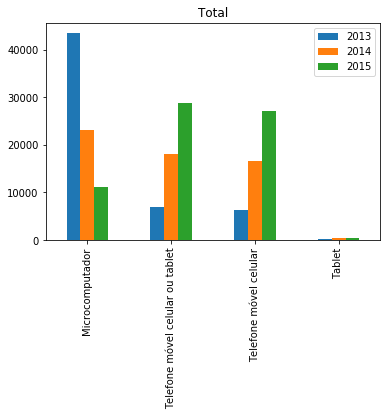

In [49]:
df_years.plot.bar(x=df_years.Gadget.iloc[:].values, title='Total')

# Define a function to plot the data for a given region

In [50]:
def plot_region(region):
    values_2015 = extract_data(excel_2015, region)
    values_2014 = extract_data(excel_2014, region)
    values_2013 = extract_data(excel_2013, region)
    
    dic = {
    'Gadget': gadgets[:4],
    '2015': values_2015, 
    '2014': values_2014, 
    '2013': values_2013
    }
    
    df_years = pd.DataFrame(dic)
    df_years.head()
    
    df_years.plot.bar(x=df_years.Gadget.iloc[:].values, title=region)

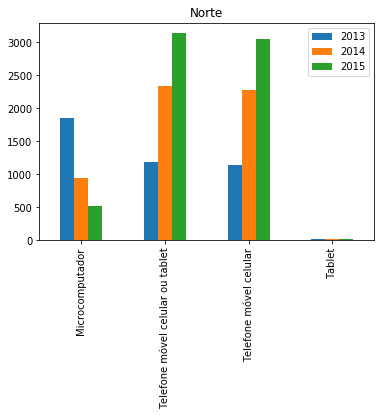

In [58]:
plot_region('Norte')

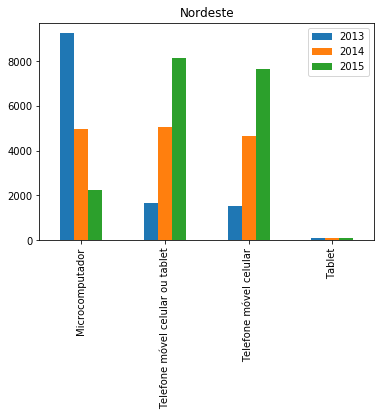

In [59]:
plot_region('Nordeste')

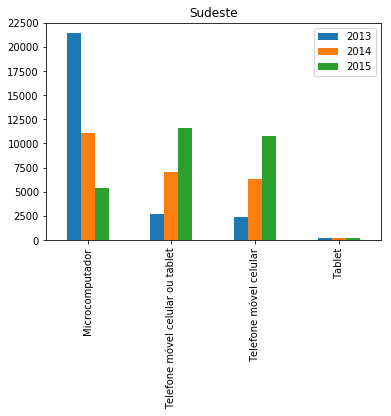

In [60]:
plot_region('Sudeste')

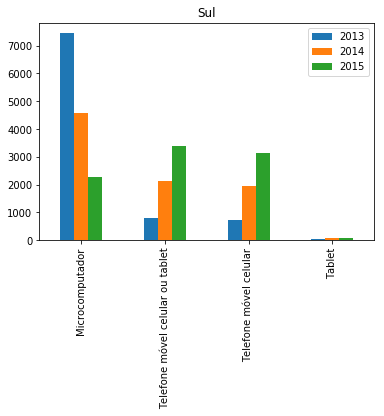

In [61]:
plot_region('Sul')

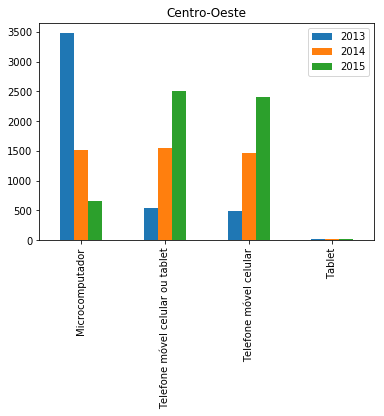

In [62]:
plot_region('Centro-Oeste')